#### This example demonstrates the end-to-end workflow for computing a correlation matrix on a very small synthetic dataset generated by a prompt-AI algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# Generate Dataset
N = 5   # number of time series
T = 5   # number of time steps per time series

np.random.seed(0) ## Ensures same random numbers every time you run it
X = np.random.randn(N, T)   # shape of matrix X is (N, T), generates random numbers from normal distribution (mean=0, std=1) 

print("Input Data Matrix (N x T):")
print(pd.DataFrame(X)) ## Converts NumPy array into table format, Amitava prefer's to read a dataset in tabular pandas form.
print("Shape:", X.shape)

start = time.time() ## Records start time, calculates the run time of the following code snippet till end = time.time()

# Single-thread CPU Baseline
# Correlation Matrix
# Normalise each time series
means = X.mean(axis=1, keepdims=True) ## .mean() → computes average, axis=1 → row-wise (each time series), keepdims=True → keeps shape as (N,1) instead of flattening
stds = X.std(axis=1, keepdims=True) ## .std() → standard deviation, axis=1 → row-wise (each time series), Measures spread of each time series
Z = (X - means) / stds ## Z = (X - means) / stds, This is standardization (z-score)
C = (Z @ Z.T) / (T - 1) ## @ : matrix multiplication {equivalent to np.matmul()} # Correlation = (Z @ Z^T) / (T - 1) #### Z.T => ".T" = transpose ## Converts (N × T) → (T × N) 
### Z @ Z.T => (N×T)⋅(T×N) => (N×N)
### Correlation = (Z @ Z.T) / (T - 1)
### Here, each element C[i, j] = (1 / (T - 1)) * sum_{k=1}^{T} (Z[i, k] * Z[j, k])
### This computes the sample correlation between time series i and j.

end = time.time()

print("\nCorrelation Matrix (N x N):")
print(pd.DataFrame(C))
print("Shape:", C.shape)
print(f"\nRuntime (single-thread CPU): {end - start:.6f} seconds")

Input Data Matrix (N x T):
          0         1         2         3         4
0  1.764052  0.400157  0.978738  2.240893  1.867558
1 -0.977278  0.950088 -0.151357 -0.103219  0.410599
2  0.144044  1.454274  0.761038  0.121675  0.443863
3  0.333674  1.494079 -0.205158  0.313068 -0.854096
4 -2.552990  0.653619  0.864436 -0.742165  2.269755
Shape: (5, 5)

Correlation Matrix (N x N):
          0         1         2         3         4
0  1.250000 -0.668397 -1.185826 -0.717164 -0.352215
1 -0.668397  1.250000  0.964521  0.360360  0.949840
2 -1.185826  0.964521  1.250000  0.716618  0.580204
3 -0.717164  0.360360  0.716618  1.250000 -0.461916
4 -0.352215  0.949840  0.580204 -0.461916  1.250000
Shape: (5, 5)

Runtime (single-thread CPU): 0.000166 seconds


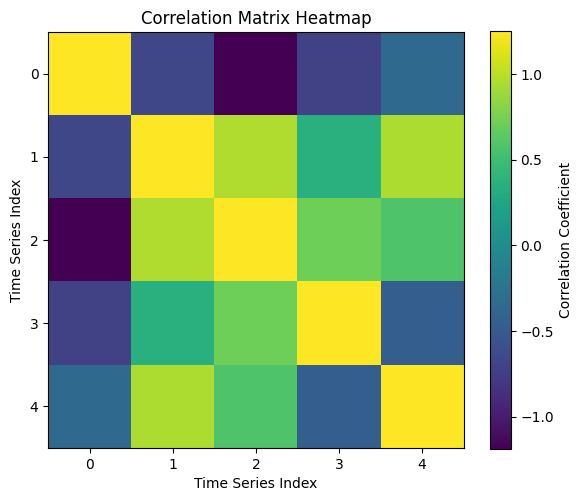

In [3]:
# Visualize Correlation Matrix
plt.figure(figsize=(6, 5))
plt.imshow(C) ## , interpolation='nearest', interpolation may be needed in some datasets
plt.colorbar(label="Correlation Coefficient")
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Time Series Index")
plt.ylabel("Time Series Index")
plt.xticks(range(N))
plt.yticks(range(N))
plt.tight_layout()
plt.show()

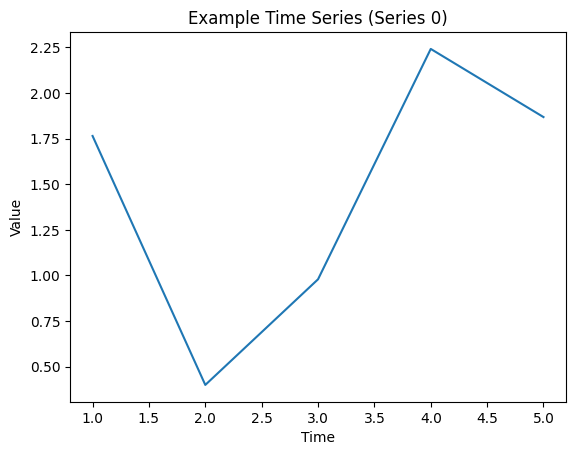

In [4]:
# Visualize One Time Series for x=0
plt.figure()
plt.plot(range(1, T+1), X[0])
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Example Time Series (Series 0)")
plt.show()

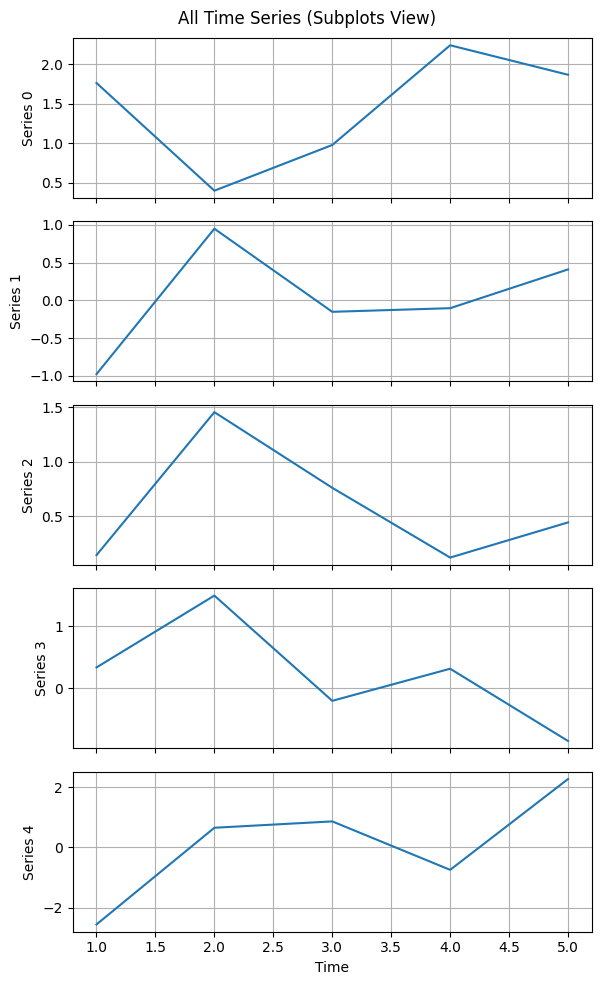

In [5]:
# Plot all time series
fig, axes = plt.subplots(N, 1, figsize=(6, 2*N), sharex=True)
# If N=1, axes is not a list, so we handle that case
if N == 1:
    axes = [axes]
for i in range(N):
    axes[i].plot(range(1, T+1), X[i])
    axes[i].set_ylabel(f"Series {i}")
    axes[i].grid(True)
axes[-1].set_xlabel("Time")
fig.suptitle("All Time Series (Subplots View)")
plt.tight_layout()
plt.show()